In [1]:
import jax.numpy as jnp
from jax import jit
import matplotlib.pyplot as plt

## ✅ 1️⃣: Problem Definition

Given a linear system:

$$
A x = b
$$

where:
- $A \in \mathbb{R}^{m \times n}$
- $b \in \mathbb{R}^{m}$

---

## ✅ 2️⃣: Row Space Method

Based on projecting $b$ onto the row space of $A$.

The key idea: Solve $A x = b$ by finding the least-norm solution using the pseudo-inverse:

$$
x = A^\top (A A^\top)^{-1} b
$$

---

## ✅ 3️⃣: Column Space Method

Based on expressing $b$ as a linear combination of $A$'s columns.

The solution is given by:

$$
x = (A^\top A)^{-1} A^\top b
$$

*(if $A^\top A$ is invertible)*


# Finding The solutions of Linear Equation using Row Space method

In [2]:
@jit
def row_space_solution(A, b):
    """ Solve Ax = b using Row Space method """
    pseudo_inv = A.T @ jnp.linalg.inv(A @ A.T)
    x = pseudo_inv @ b
    return x

# Finding The solutions of Linear Equation using Column Space method



In [3]:
@jit
def column_space_solution(A, b):
    """ Solve Ax = b using Column Space method """
    pseudo_inv = jnp.linalg.inv(A.T @ A) @ A.T
    x = pseudo_inv @ b
    return x

In [8]:
def visualize_2d(A, b, x_row, x_col):
    fig, ax = plt.subplots(figsize=(8,8))

    a1 = A[:, 0]
    a2 = A[:, 1]
    origin = jnp.zeros(2)

    # Plot column vectors of A
    ax.quiver(*origin, *a1, angles='xy', scale_units='xy', scale=1, color='r', label='A[:,0]')
    ax.quiver(*origin, *a2, angles='xy', scale_units='xy', scale=1, color='g', label='A[:,1]')

    # Plot b
    ax.quiver(*origin, *b, angles='xy', scale_units='xy', scale=1, color='b', label='b')

    # Reconstruct b from computed x's
    b_row = A @ x_row
    b_col = A @ x_col

    # Plot reconstructed b (without problematic linestyle)
    ax.quiver(*origin, *b_row, angles='xy', scale_units='xy', scale=1, color='m', label='b (Row Space)')
    ax.quiver(*origin, *b_col, angles='xy', scale_units='xy', scale=1, color='c', label='b (Column Space)')

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid(True)
    ax.set_aspect('equal')
    ax.legend()
    plt.show()

Solution (Row Space): [1.8       1.4000001]
Solution (Column Space): [1.8       1.4000001]


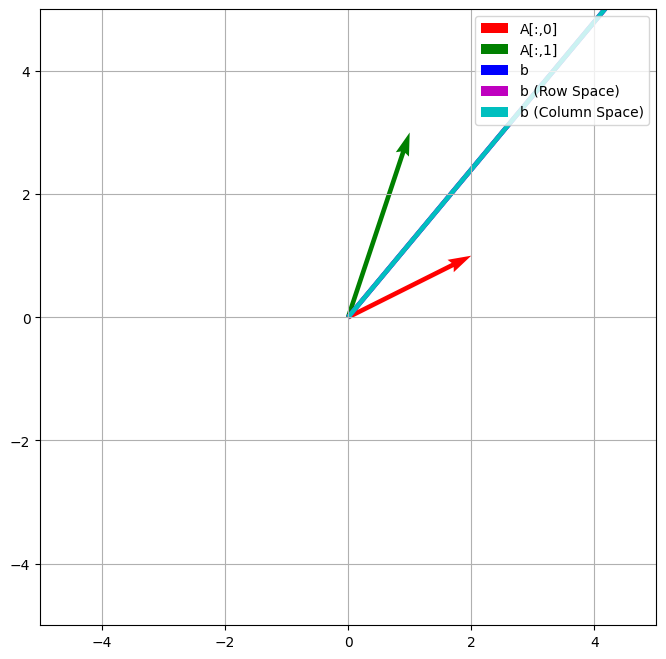

In [9]:
# Example 2D System
A = jnp.array([[2.0, 1.0],
               [1.0, 3.0]])

b = jnp.array([5.0, 6.0])

# Compute solutions
x_row = row_space_solution(A, b)
x_col = column_space_solution(A, b)

print("Solution (Row Space):", x_row)
print("Solution (Column Space):", x_col)

# Visualization
visualize_2d(A, b, x_row, x_col)


In [7]:
# Example higher dimension (3x3 system)
A_hd = jnp.array([[1.0, 2.0, 3.0],
                  [0.0, 1.0, 4.0],
                  [5.0, 6.0, 0.0]])

b_hd = jnp.array([14.0, 10.0, 32.0])

x_row_hd = row_space_solution(A_hd, b_hd)
x_col_hd = column_space_solution(A_hd, b_hd)

print("\nHigh-Dimensional Test:")
print("Solution (Row Space):", x_row_hd)
print("Solution (Column Space):", x_col_hd)

# Verify Ax == b
print("\nVerification Row Space:", A_hd @ x_row_hd)
print("Verification Column Space:", A_hd @ x_col_hd)



High-Dimensional Test:
Solution (Row Space): [4.001404  2.0009766 2.0039062]
Solution (Column Space): [3.9750671 2.0062866 2.000801 ]

Verification Row Space: [14.015076 10.016602 32.01288 ]
Verification Column Space: [13.990044 10.009491 31.913055]
